In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris : 150 individus, iris_dna : 146 individus


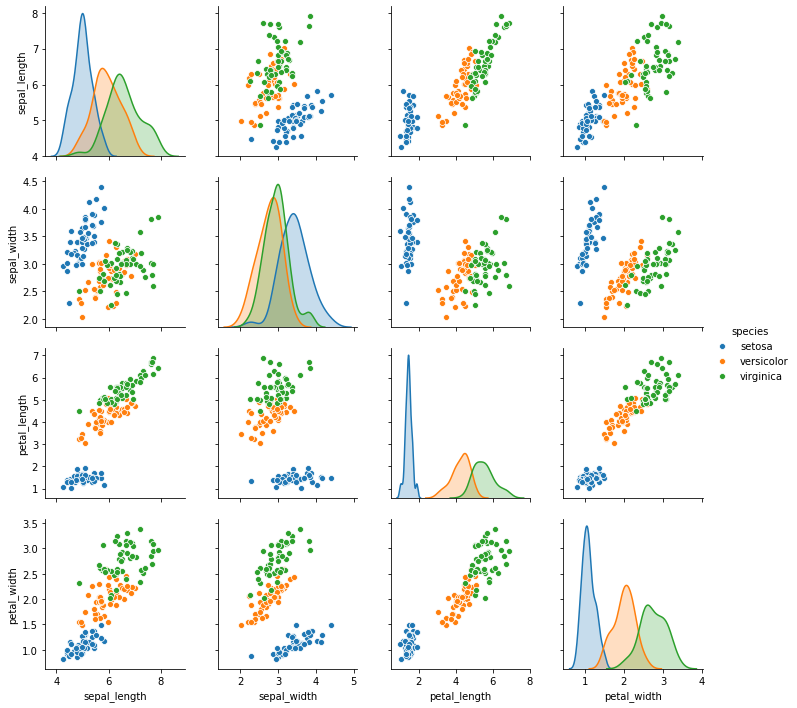

In [211]:
# Chargement
iris = pd.read_csv("iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

In [212]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [213]:
iris_dna.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
5,5.430821,3.884073,1.699534,1.370708,setosa


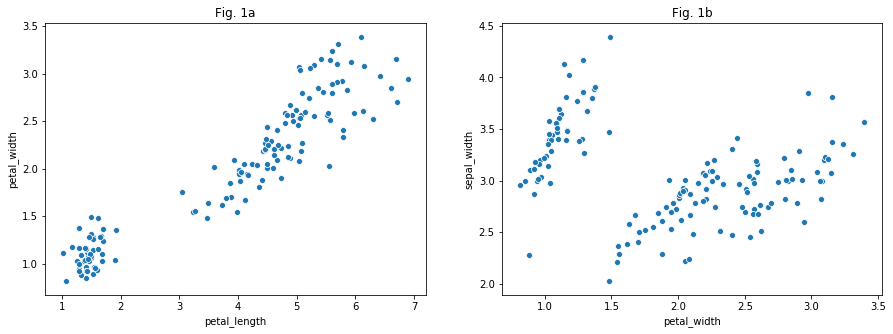

In [214]:
# On plot le deux diagrammes sur le quels on va cacluler le coefficient de correlation:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Fig. 1a")
sns.scatterplot(x="petal_length", y="petal_width", data=iris_dna)#, hue="species")
fig.add_subplot(1,2,2)
plt.title("Fig. 1b")
sns.scatterplot(x="petal_width", y="sepal_width", data=iris_dna)#, hue="species")
plt.show()

In [215]:
import scipy.stats as st  # Pour le coefficient de correlation on utilise le module .stats de numpy

# On calcule les coefficients de correlation
print("Coefficient de correlation(petal_length,petal_width) = ", st.pearsonr(iris_dna['petal_length'], iris_dna['petal_width'])[0])
print("Coefficient de correlation(petal_width,sepal_width) = ", st.pearsonr(iris_dna['petal_width'], iris_dna['sepal_width'])[0])

Coefficient de correlation(petal_length,petal_width) =  0.9418817573025174
Coefficient de correlation(petal_width,sepal_width) =  -0.247971306157846


In [216]:
# Si on calcule le coefficient de correlation entre 'sepal_width' et 'petal_width' par espece on trouve:
print("Coefficient de correlation(petal_width,sepal_width) iris_setosa = ", st.pearsonr(iris_setosa['petal_width'], iris_setosa['sepal_width'])[0])
print("")
print("Coefficient de correlation(petal_width,sepal_width) iris_virginica = ", st.pearsonr(iris_virginica['petal_width'], iris_virginica['sepal_width'])[0])
print("")
print("Coefficient de correlation(petal_width,sepal_width) iris_versicolor = ", st.pearsonr(iris_versicolor['petal_width'], iris_versicolor['sepal_width'])[0])

Coefficient de correlation(petal_width,sepal_width) iris_setosa =  0.7531349595699939

Coefficient de correlation(petal_width,sepal_width) iris_virginica =  0.6850773581335285

Coefficient de correlation(petal_width,sepal_width) iris_versicolor =  0.8250525564073544


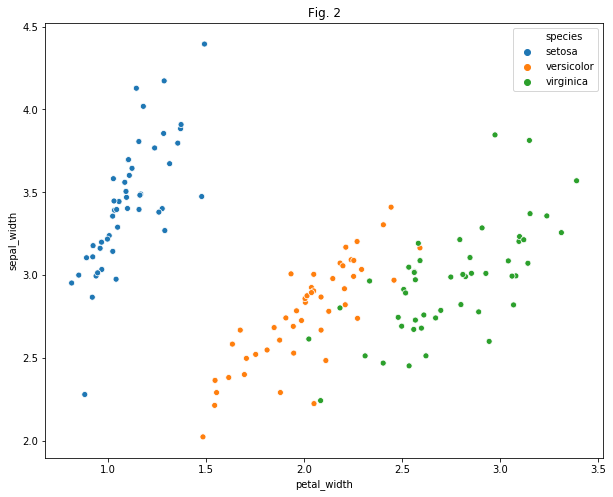

In [217]:
# L'anticorrelation (i.e. coeff. correlation negatif = -0.247) trouvée sans distinguer entre especes etait seulement apparente.
# Si on scatterplot le 'sepal_width' VS le 'petal_wisdh' par espece, on voit bien la correlation positive qu'on viens de calculer
fig = plt.figure(figsize=(10,8))
plt.title("Fig. 2")
sns.scatterplot(x="petal_width", y="sepal_width", data=iris_dna, hue="species")
plt.show()

In [218]:
# Pour la regression lineaire on utilise la librerie Scikitlearn

# Si vous n'avez pas installé cette librerie (vous devriez le faire le plus tot possible!! Elle est 
# hyper-puissante ;) 
# Et sinon, entre temps, vous pouvez commenter les lignées suivantes et 
# regarder le bloc de apres qui performe la meme analyse à l'aide du module 'statsmodels.api'.

from sklearn.linear_model import LinearRegression

# Données pour la premiere regression sur iris_dna
data1 = iris_dna['petal_length'][:, np.newaxis] # LinearRegression.fit() s'attend comme abscisse un vecteur en 2D
target1 = iris_dna['petal_width']
# theta1 contiens les parametres (a1,b1) de la premiere regression
regr1 = LinearRegression().fit(data1, target1)
theta1 = regr1.coef_[0], regr1.intercept_
print('a1, b1 (iris) = {}'.format(theta1))

# Données pour la deuxieme regression sur iris_setosa
data2 = iris_setosa['petal_width'][:, np.newaxis]
target2 = iris_setosa['sepal_width']
# theta2 contiens les parametres (a2,b2) de la deuxieme regression
regr2 = LinearRegression().fit(data2, target2)
theta2 = regr2.coef_[0], regr2.intercept_
print('a2, b2 (setosa) = {}'.format(theta2))

# Données pour la troisieme regression sur iris_virginica
data3 = iris_virginica['petal_width'][:, np.newaxis]
target3 = iris_virginica['sepal_width']
# theta3 contiens les parametres (a3,b3) de la troisieme regression
regr3 = LinearRegression().fit(data3, target3)
theta3 = regr3.coef_[0], regr3.intercept_
print('a3, b3 (virginica) = {}'.format(theta3))

# Données pour la quatrieme regression sur iris_versicolor
data4 = iris_versicolor['petal_width'][:, np.newaxis]
target4 = iris_versicolor['sepal_width']
# theta4 contiens les parametres (a4,b4) de la quatrieme regression
regr4 = LinearRegression().fit(data4, target4)
theta4 = regr4.coef_[0], regr4.intercept_
print('a4, b4 (versicolor) = {}'.format(theta4))

a1, b1 (iris) = (0.3859942100308644, 0.5092683365300008)
a2, b2 (setosa) = (1.7875014940283414, 1.4593274917352768)
a3, b3 (virginica) = (0.699250595971297, 1.0377429413261876)
a4, b4 (versicolor) = (0.9735704312621849, 0.8094893720788439)


In [219]:
# Si vous n'avez pas installé la librerie Scikit-learn, le bloc suivant calcule de nouveau le parametres
# a, b pour les quatre regressions:
import statsmodels.api as sm

Y1 = iris_dna['petal_width']
X1 = iris_dna[['petal_length']]
X1 = X1.copy()
X1['intercept'] = 1.
result1 = sm.OLS(Y1, X1).fit() 
a1,b1 = result1.params['petal_length'],result1.params['intercept']
print('a1, b1 (iris) = {}, {}'.format(a1,b1))

Y2 = iris_setosa['sepal_width']
X2 = iris_setosa[['petal_width']]
X2 = X2.copy()
X2['intercept'] = 1.
result2 = sm.OLS(Y2, X2).fit() 
a2,b2 = result2.params['petal_width'],result2.params['intercept']
print('a2, b2 (setosa) = {}, {}'.format(a2,b2))

Y3 = iris_virginica['sepal_width']
X3 = iris_virginica[['petal_width']]
X3 = X3.copy()
X3['intercept'] = 1.
result3 = sm.OLS(Y3, X3).fit() 
a3,b3 = result3.params['petal_width'],result3.params['intercept']
print('a3, b3 (virginica) = {}, {}'.format(a3,b3))

Y4 = iris_versicolor['sepal_width']
X4 = iris_versicolor[['petal_width']]
X4 = X4.copy()
X4['intercept'] = 1.
result4 = sm.OLS(Y4, X4).fit() 
a4,b4 = result4.params['petal_width'],result4.params['intercept']
print('a4, b4 (versicolor) = {}, {}'.format(a4,b4))

a1, b1 (iris) = 0.38599421003086476, 0.50926833653
a2, b2 (setosa) = 1.7875014940283402, 1.4593274917352779
a3, b3 (virginica) = 0.6992505959712972, 1.0377429413261894
a4, b4 (versicolor) = 0.9735704312621852, 0.8094893720788432


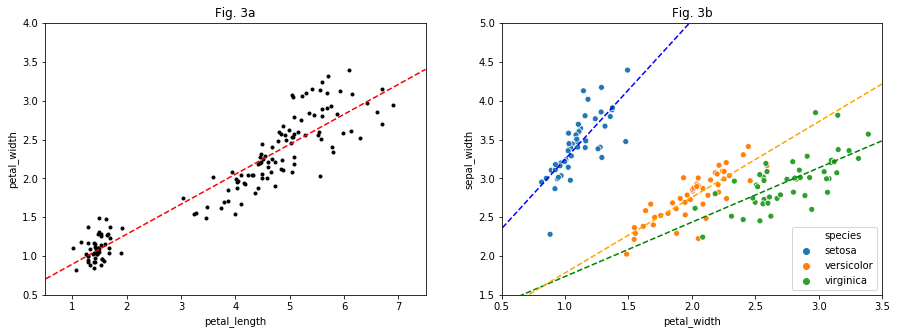

In [220]:
# On peut voir un plot avec les regressions lineaires superposées sur les données:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.ylabel("petal_width")
plt.xlabel("petal_length")
plt.title("Fig. 3a")
plt.plot(iris_dna['petal_length'], iris_dna['petal_width'], 'ko', markersize=3)
plt.plot([0,7.5], [theta1[1],theta1[1] + 7.5 * theta1[0]], linestyle='--', c='red')
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 4.0)
fig.add_subplot(1,2,2)
plt.title("Fig. 3b")
sns.scatterplot(x="petal_width", y="sepal_width", data=iris_dna, hue="species")
plt.plot([0,3.5], [theta2[1],theta2[1] + 3.5 * theta2[0]], linestyle='--', c='blue')
plt.plot([0,3.5], [theta3[1],theta3[1] + 3.5 * theta3[0]], linestyle='--', c='green')
plt.plot([0,3.5], [theta4[1],theta4[1] + 3.5 * theta4[0]], linestyle='--', c='orange')
plt.xlim(0.5, 3.5)
plt.ylim(1.5, 5.0)
plt.show()

In [221]:
coeffs = {
    "cas 1" : {'a': theta1[0] , 'b': theta1[1]}, # iris_dna
    "cas 2" : {'a': theta2[0] , 'b': theta2[1]}, # iris_setosa
    "cas 3" : {'a': theta3[0] , 'b': theta3[1]}, # iris_virginica
    "cas 4" : {'a': theta4[0] , 'b': theta4[1]}, # iris_versicolor
}
#print(coeffs)
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]        
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        if espece=="setosa":
            a = coeffs["cas 2"]['a']
            b = coeffs["cas 2"]['b']
        elif espece=="virginica":
            a = coeffs["cas 3"]['a']
            b = coeffs["cas 3"]['b']
        elif espece=="versicolor":
            a = coeffs["cas 4"]['a']
            b = coeffs["cas 4"]['b']    
        Y = a*X + b
        iris.loc[i,"sepal_width"] = Y
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))

On a complété sepal_width par 3.251018116408286 a partir de l'espece:setosa et de petal_width=1.0023435676326218
On a complété petal_width par 2.063990474674412 a partir de petal_length=4.027837977207209
On a complété sepal_width par 3.009714075281927 a partir de l'espece:versicolor et de petal_width=2.259954321281721
On a complété sepal_width par 3.3605641964807083 a partir de l'espece:virginica et de petal_width=3.3218723995908728
